In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import try_all_threshold

In [2]:
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

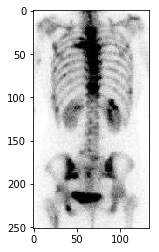

In [3]:
index = '030420150004._3'
img = cv2.imread('../data/rib_image/APRIL/03042015/'+index+'.jpg')
# img = cv2.imread('../data/bone_scan_crop/1_JAN/05012015/050120150005._3.jpg')
height, width = img.shape[:2]
plt.imshow(img,'gray')
plt.show()

In [4]:
height,width

(251, 134)

In [5]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# eq_img = cv2.equalizeHist(gray_img)
# plt.imshow(eq_img,'gray')
# plt.show()

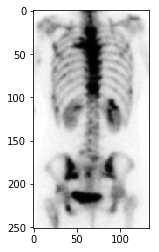

In [6]:
# blur_img = cv2.medianBlur(gray_img,5)
blur_img = cv2.GaussianBlur(gray_img,(5,5),0)
plt.imshow(blur_img,cmap = 'gray')
plt.show()

## Edge detection

In [7]:
def convert_func(x):
    if(x==True):
        x = 255
    else:
        x = 0
    return(x)

conv_func = np.vectorize(convert_func)

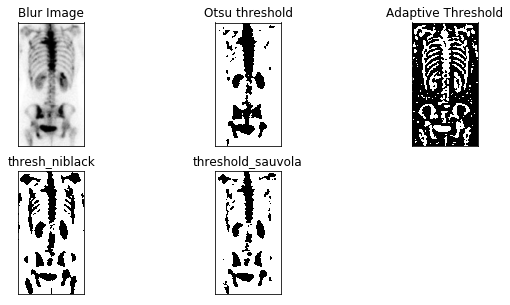

In [8]:
# otsu's threshold
ret,binary_img = cv2.threshold(blur_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
binary_img2 = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,11,3)
window_size = 37
thresh_niblack = threshold_niblack(blur_img, window_size=window_size, k=0.3)
thresh_sauvola = threshold_sauvola(blur_img, window_size=window_size)

binary_niblack = conv_func(blur_img > thresh_niblack)
binary_niblack = np.array(binary_niblack,dtype = np.uint8)

binary_sauvola = conv_func(blur_img > thresh_sauvola)
binary_sauvola = np.array(binary_sauvola,dtype = np.uint8)

# binary_niblack = blur_img > thresh_niblack
# binary_sauvola = blur_img > thresh_sauvola
# fig, ax = try_all_threshold(blur_img, figsize=(10, 8), verbose=True)
# plt.imshow(binary_img,'gray')
# plt.show()
titles = ['Blur Image','Otsu threshold','Adaptive Threshold','thresh_niblack','threshold_sauvola']
images = [blur_img, binary_img, binary_img2,binary_niblack,binary_sauvola]
fig = plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

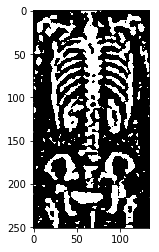

In [9]:
plt.imshow(binary_img2,'gray')
plt.show()

In [10]:
thresh_niblack.shape
# binary_img = binary_niblack
binary_img = binary_img2

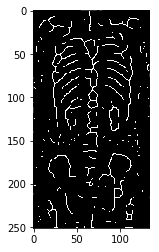

In [11]:
thinning_img = cv2.ximgproc.thinning(binary_img)
plt.imshow(thinning_img,'gray')
plt.show()

## Vertebra detection

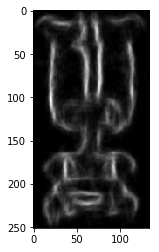

In [12]:
vetebra_img = cv2.cvtColor(blur_img,cv2.COLOR_GRAY2BGR)
vetebra_img = np.float32(vetebra_img)
vetebra_img = vetebra_img/255.0
structuredEdgeModel = cv2.ximgproc.createStructuredEdgeDetection("../materials/structuredEdgeModel.yml")
vetebra_img = structuredEdgeModel.detectEdges(vetebra_img)
plt.imshow(vetebra_img,cmap = 'gray')
plt.show()

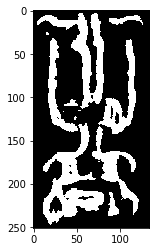

In [13]:
def convert_func(x):
    if(x==True):
        x = 255
    else:
        x = 0
    return(x)

binary_vertebra = vetebra_img*255
binary_vertebra = binary_vertebra>25
conv_func = np.vectorize(convert_func)
binary_vertebra = conv_func(binary_vertebra)
binary_vertebra = np.array(binary_vertebra,dtype = np.uint8)
plt.imshow(binary_vertebra,'gray')
plt.show()

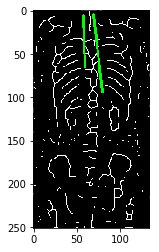

In [14]:
thinning_img_bgr = cv2.cvtColor(thinning_img,cv2.COLOR_GRAY2BGR)
annotated_img = np.zeros((height,width,3), dtype=np.uint8)
annotated_original_img = np.zeros((height,width,3), dtype=np.uint8)
np.copyto(annotated_img,thinning_img_bgr)
np.copyto(annotated_original_img,img)
lines = cv2.HoughLinesP(binary_vertebra, 1, np.pi/180, 100, 0, 60)

#Find Left and right vertebra line
x_center = (np.amin(lines,axis=0)[0][0] + np.amax(lines,axis=0)[0][0])/2
right_lines = lines[lines[:,:,0]-x_center>=0]
right_line = right_lines[np.argmin(right_lines[:,0])]
left_lines = lines[lines[:,:,0]-x_center<0]
left_line = left_lines[np.argmax(left_lines[:,0])]

#Annotated
cv2.line(annotated_img,(left_line[0],left_line[1]),(left_line[2],left_line[3]),(0,255,0),2)
cv2.line(annotated_img,(right_line[0],right_line[1]),(right_line[2],right_line[3]),(0,255,0),2)

cv2.line(annotated_original_img,(left_line[0],left_line[1]),(left_line[2],left_line[3]),(0,255,0),2)
cv2.line(annotated_original_img,(right_line[0],right_line[1]),(right_line[2],right_line[3]),(0,255,0),2)


# for x in range(0, len(lines)):
#     for x1,y1,x2,y2 in lines[x]:
#         cv2.line(annotated_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(annotated_img,'gray')
plt.show()

In [15]:
line_threshold = 95
while(lines is None):
    line_threshold 
    lines = cv2.HoughLinesP(binary_vertebra, 1, np.pi/180, line_threshold, 0, 60)


1 height = 227 gap = 24
2 height = 170 gap = 57
3 height = 129 gap = 41
4 height = 114 gap = 15
5 height = 96 gap = 18
6 height = 85 gap = 11
7 height = 72 gap = 13
8 height = 62 gap = 10
9 height = 53 gap = 9
10 height = 43 gap = 10
11 height = 28 gap = 15
12 height = 19 gap = 9


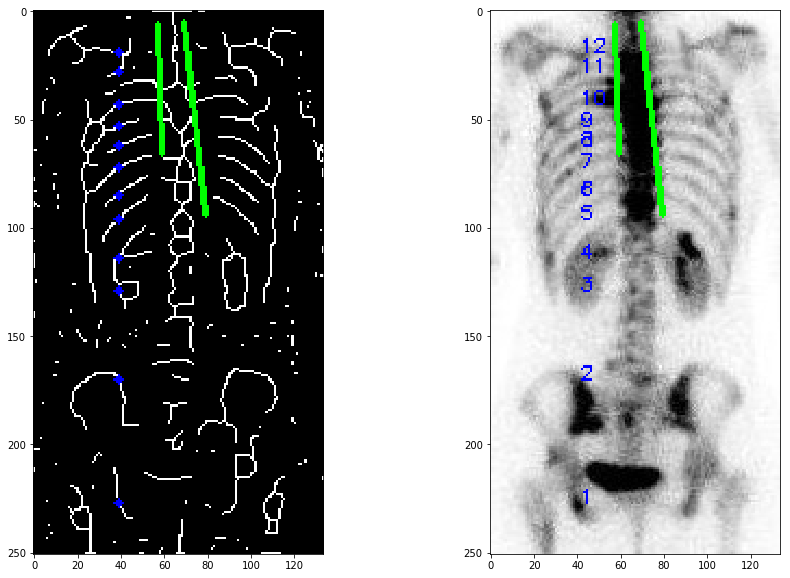

In [16]:
count_width = 18   #The length between the vertebra line and x-position which we count rib
spacing_height = 0 #the moving down length when annotated the original image ex.4
gap_threshold = 7

count = 1
tmp_height = height
for i in range(height-1,0,-1):
    gap = abs(i - tmp_height)
    if((annotated_img[i][left_line[0]-count_width][0] != 0) and (gap >= gap_threshold) ):
        cv2.circle(annotated_img,(left_line[0]-count_width,i), 2, (0,0,255), -1)
#         cv2.circle(annotated_original_img,(left_line[0]-count_width,i), 2, (0,0,255), -1)
        cv2.putText(annotated_original_img,str(count),(left_line[0]-count_width+2,i-spacing_height),cv2.FONT_HERSHEY_SIMPLEX,0.3,(0,0,255),1)
        print(str(count)+" height = " + str(i) + " gap = "+str(gap))
        tmp_height = i
        count = count + 1

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1),plt.imshow(annotated_img,'gray')
plt.subplot(1,2,2),plt.imshow(annotated_original_img)
plt.show()

In [17]:
import scipy.misc
scipy.misc.imsave('../output/april/'+index+'.jpg', annotated_original_img)